# Financial Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# !pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org quandl
import quandl

## Portfolio

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [3]:
# Grabbing a bunch of tech stocks for our portfolio
aapl = quandl.get('WIKI/AAPL.11',
                  start_date=start,
                  end_date=end)
cisco = quandl.get('WIKI/CSCO.11',
                   start_date=start,
                   end_date=end)
ibm = quandl.get('WIKI/IBM.11',
                 start_date=start,
                 end_date=end)
amzn = quandl.get('WIKI/AMZN.11',
                  start_date=start,
                  end_date=end)

In [4]:
# Alternatives
'''
aapl = pd.read_csv('AAPL_CLOSE',
                   index_col = 'Date',
                   parse_dates = True)
cisco = pd.read_csv('CISCO_CLOSE',
                    index_col = 'Date',
                    parse_dates = True)
ibm = pd.read_csv('IBM_CLOSE',
                  index_col = 'Date',
                  parse_dates = True)
amzn = pd.read_csv('AMZN_CLOSE',
                   index_col = 'Date',
                   parse_dates = True)
                   
aapl.to_csv('AAPL_CLOSE')
cisco.to_csv('CISCO_CLOSE')
ibm.to_csv('IBM_CLOSE')
amzn.to_csv('AMZN_CLOSE')
'''

"\naapl = pd.read_csv('AAPL_CLOSE',\n                   index_col = 'Date',\n                   parse_dates = True)\ncisco = pd.read_csv('CISCO_CLOSE',\n                    index_col = 'Date',\n                    parse_dates = True)\nibm = pd.read_csv('IBM_CLOSE',\n                  index_col = 'Date',\n                  parse_dates = True)\namzn = pd.read_csv('AMZN_CLOSE',\n                   index_col = 'Date',\n                   parse_dates = True)\n                   \naapl.to_csv('AAPL_CLOSE')\ncisco.to_csv('CISCO_CLOSE')\nibm.to_csv('IBM_CLOSE')\namzn.to_csv('AMZN_CLOSE')\n"

### Normalize Prices
This is the same as cumulative daily returns.

In [5]:
aapl.iloc[0]['Adj. Close']

52.848786580038

In [6]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [7]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


### Allocations
Let's pretend we had the following allocations for our total portfolio:
* $30\%$ in Apple
* $20\%$ in Google/Alphabet
* $40\%$ in Amazon
* $10\%$ in IBM

Let's have these values be reflected by multiplying our Norme Return by out Allocations.

In [8]:
for stock_df, allo in zip([aapl, cisco, ibm, amzn], [.3, .2, .4, .1]):
    stock_df['Allocation'] = stock_df['Normed Return'] * allo

In [9]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


### Investment
Let's pretend we invested a million dollars in this portfolio.

In [10]:
for stock_df in [aapl,cisco,ibm,amzn]:
    stock_df['Position Values'] = stock_df['Allocation'] * 1000000

## Total Portfolio Value

In [11]:
portfolio_val = pd.concat([aapl['Position Values'],
                           cisco['Position Values'],
                           ibm['Position Values'],
                           amzn['Position Values']],
                          axis=1)

In [12]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [13]:
portfolio_val.columns = ['AAPL Pos', 'CISCO Pos', 'IBM Pos', 'AMZN Pos']

In [14]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [15]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [16]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


Text(0.5, 1.0, 'Total Portfolio Value')

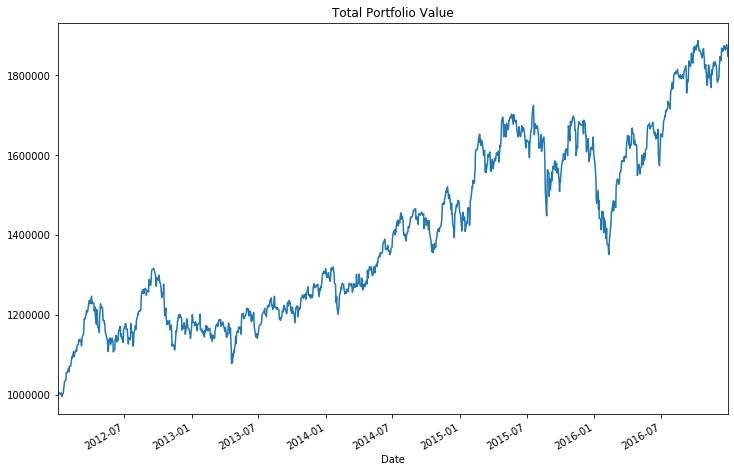

In [17]:
portfolio_val['Total Pos'].plot(figsize = (12, 8))
plt.title('Total Portfolio Value')

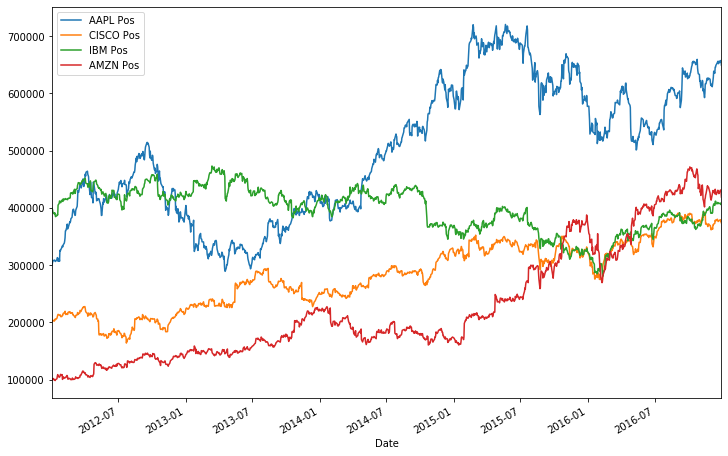

In [18]:
portfolio_val.drop('Total Pos', axis=1).plot(kind='line', figsize=(12, 8))

In [19]:
portfolio_val.tail()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389,1.862933e+06
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563,1.876025e+06
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454,1.868094e+06
2016-12-29,654441.973495,376603.544631,407091.167926,427386.471541,1.865523e+06
2016-12-30,649340.095692,373636.215323,405600.618032,418851.589119,1.847429e+06
